In [1]:
from os import listdir
from os.path import isfile, join
import pickle
import matplotlib.pyplot as plt


In [2]:
def print_max(x):
    """For better printing"""
    print('Loss:', x[0]['loss'])
    print('Binary accuracy:', x[0]['binary_accuracy'])
    print('Intersection-Over-Union accuracy:', x[0]['binary_io_u'])
    print('Parameters:\n', x[1])

In [3]:
# parse files
mypath = 'results/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

res_substr = 'evaluate_result'
CNN_substr = 'CNN'
CNNfiles = [i for i in onlyfiles if (CNN_substr in i and res_substr in i)]

LSTM_substr = 'LSTM'
LSTMfiles = [i for i in onlyfiles if (LSTM_substr in i and res_substr in i)]

In [4]:
# CNN results
CNNresults = []
for file in CNNfiles:
    with open('results/' + file, 'rb') as f:
        result = pickle.load(f)
        CNNresults.append([result, file])

obj = max(CNNresults, key=lambda x: x[0]['binary_io_u'])
print_max(obj)

Loss: 0.005103616509586573
Binary accuracy: 0.9803679585456848
Intersection-Over-Union accuracy: 0.7283769845962524
Parameters:
 CNN-kernel_size=5-kernel_stride=1-dropout_rate=0.0-l2_regularization=0.0-pool_size=2-pool_stride=2-learning_rate=0.0001-focal_gamma=5.0-epochs=100-batch_size=50-evaluate_result


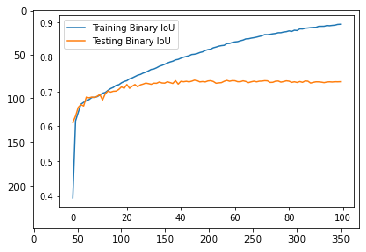

In [5]:
with open (f"results/CNN-kernel_size=5-kernel_stride=1-dropout_rate=0.0-l2_regularization=0.0-pool_size=2-pool_stride=2-learning_rate=0.0001-focal_gamma=5.0-epochs=100-batch_size=50-history", "rb") as f:
    result = pickle.load(f)
    plt.plot(result['binary_io_u'], label='Training Binary IoU')
    plt.plot(result['val_binary_io_u'], label='Testing Binary IoU')
    plt.legend()

In [6]:
# LSTM results
LSTMresults = []
for file in LSTMfiles:
    with open('results/' + file, 'rb') as f:
        result = pickle.load(f)
        LSTMresults.append([result, file])

obj = max(LSTMresults, key=lambda x: x[0]['binary_io_u'])
print_max(obj)

Loss: 0.0019923171494156122
Binary accuracy: 0.9788508415222168
Intersection-Over-Union accuracy: 0.6148695349693298
Parameters:
 LSTM-units=100-dropout_rate=0.2-learning_rate=0.0001-focal_gamma=5.0-epochs=100-batch_size=50-evaluate_result


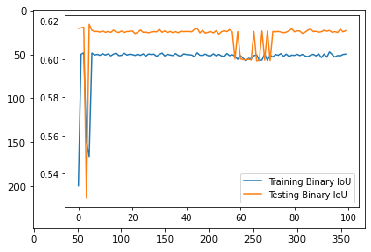

In [7]:
with open (f"results/LSTM-units=100-dropout_rate=0.2-learning_rate=0.0001-focal_gamma=5.0-epochs=100-batch_size=50-history", "rb") as f:
    result = pickle.load(f)
    plt.plot(result['binary_io_u'], label='Training Binary IoU')
    plt.plot(result['val_binary_io_u'], label='Testing Binary IoU')
    plt.legend()